# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv("./Temp_States.csv",encoding = "ISO-8859-1")

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# There are three columns in the dataframe. City and State have strings with the names of the cities and states. 
# The third one is formed by temperatures, as floats. 
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
temp_newyork = temp[temp['State'] == "New York"]
temp_newyork

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
round(temp_newyork['Temperature'].mean(), 3)

10.741

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
above_15 =  temp.loc[:, "Temperature"] > 15
c_above_15 = temp.loc[above_15]
c_above_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
above_15_city =  temp[['City', 'Temperature']]
above_15_cities = above_15_city[above_15_city['Temperature'] > 15]
above_15_cities

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


In [9]:
# It is possible to put the name of the main dataframe when filtering the data. 
above_15_city =  temp[['City', 'Temperature']]
above_15_cities = above_15_city[temp['Temperature'] > 15]
above_15_cities

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [10]:
between = temp[['City', 'Temperature']]
between_15_20 = between[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]
between_15_20

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [11]:
temp.groupby('State')['Temperature'].mean()

State
Connecticut    15.833333
New Jersey     21.111111
New York       10.740741
Name: Temperature, dtype: float64

In [12]:
temp.groupby('State')['Temperature'].std()

State
Connecticut    1.964186
New Jersey     1.571348
New York       8.133404
Name: Temperature, dtype: float64

In [13]:
temps = temp[['State', 'Temperature']]
temps_mean = temps.groupby(['State']).mean().reset_index()
temps_mean

,State,Temperature
0,Connecticut,15.833333
1,New Jersey,21.111111
2,New York,10.740741


In [14]:
temps_std = temps.groupby(['State']).std().reset_index()
temps_std

,State,Temperature
0,Connecticut,1.964186
1,New Jersey,1.571348
2,New York,8.133404


In [15]:
res = temp.groupby("State")["Temperature"].agg(['mean', 'std']).reset_index()
res

,State,mean,std
0,Connecticut,15.833333,1.964186
1,New Jersey,21.111111,1.571348
2,New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [16]:
employee = pd.read_csv("./employee.csv",encoding = "ISO-8859-1")

#### Explore the data types of the Temp dataframe. Comment your results

In [17]:
# There are seven columns in the dataframe. Five have values as stringes, and the last two as integers 
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

<AxesSubplot:ylabel='Count'>

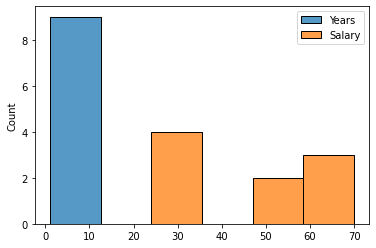

In [18]:
# The histplot of all the dataframe is confusing. It is better to do one for Years and one for Salary. 
sns.histplot(employee)

<AxesSubplot:xlabel='Years', ylabel='Count'>

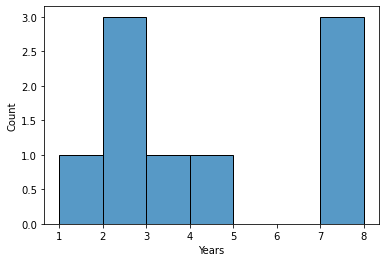

In [19]:
# This shows that most of the employees have been working between two and three years, and between seven and eight years. 
sns.histplot(employee['Years'], bins=7)

<AxesSubplot:xlabel='Salary', ylabel='Count'>

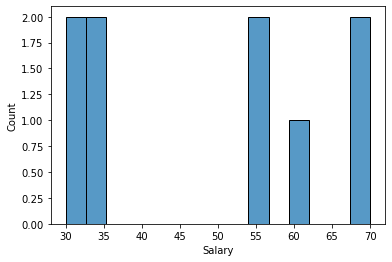

In [20]:
# Regarding the salaries, most are between 30 and 35
sns.histplot(employee['Salary'], bins = 15)

#### What's the average salary in this company?

In [21]:
average_salary = round(employee['Salary'].mean(), 2)
average_salary

48.89

#### What's the highest salary?

In [22]:
max_salary = employee['Salary'].max()
max_salary

70

#### What's the lowest salary?

In [23]:
min_salary = employee['Salary'].min()
min_salary

30

#### Who are the employees with the lowest salary?

In [24]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [25]:
lower = employee[['Name', 'Salary']]
lower_salary = lower[lower['Salary'] == 30]
lower_salary

,Name,Salary
1,Maria,30
2,David,30


#### Could you give all the information about an employee called David?

In [26]:
david = employee[employee['Name'] == 'David']
david


,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [27]:
david_info = employee[['Name','Salary']]
david_salary = david_info[david_info['Name'] == 'David']
david_salary

,Name,Salary
2,David,30


#### Print all the rows where job title is associate

In [28]:
associate = employee[employee['Title'] == "associate"]
associate

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [29]:
employee[:3]


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [30]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [31]:
title_salary = employee[(employee['Title'] == 'associate') & (employee['Salary'] == 55)]
title_salary

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [32]:
mean_salaries = round(employee.groupby(['Years']).mean().reset_index(), 3)
mean_salaries

,Years,Salary
0,1,35.000
1,2,38.333
2,3,55.000
3,4,35.000
4,7,60.000
5,8,70.000


####  What is the average Salary per title?

In [71]:
title_salaries_mean = round(employee.groupby(['Title']).mean().reset_index(), 3)
title_salaries_mean

,Title,Years,Salary
0,VP,8.00,70.000
1,analyst,2.25,32.500
2,associate,4.00,56.667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

Quartiles are part of quantiles; but only the ones that divide the distribution into four equal parts (25, 50, 75 and 100). Percentiles are quantiles that divide a distribution into 100 equal parts

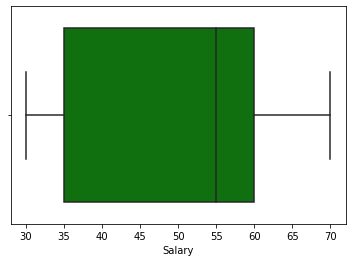

In [34]:
boxplot_salaries = sns.boxplot(x = "Salary", data = employee, color="green")

boxplot_salaries
plt.show()

In [35]:
# The first, second and the third quartiles are the ones shown in the box of the boxplot
#(both lines in each side and the middle one). 
# The cell bellow shows the quantiles. We can see that the first one is 35, the second 55 and the third one 60. 

In [36]:
employee['Salary'].quantile(np.arange(0, 1.1, 0.25))

0.00    30.0
0.25    35.0
0.50    55.0
0.75    60.0
1.00    70.0
Name: Salary, dtype: float64

In [37]:
# This shows all the quantiles of the Salary column. 
employee['Salary'].quantile(np.arange(0, 1.1, 0.1))

0.0    30.0
0.1    30.0
0.2    33.0
0.3    35.0
0.4    39.0
0.5    55.0
0.6    55.0
0.7    58.0
0.8    64.0
0.9    70.0
1.0    70.0
Name: Salary, dtype: float64

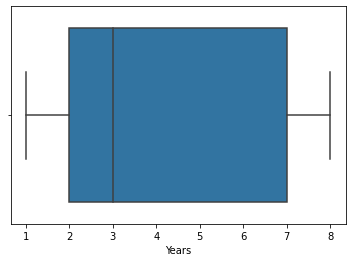

In [38]:
# The first, second and the third quartiles are the ones shown in the box of the boxplot
#(both lines in each side and the middle one). 
# The cell bellow shows the quantiles, and it can be seen that the second quartile is 55. 
boxplot_years = sns.boxplot(x = "Years", data = employee)

boxplot_years
plt.show()

In [39]:
# Same as with the salaries. Here the first quartile is 2, the second 3 and the third 7. 
employee['Years'].quantile(np.arange(0, 1.1, 0.25))

0.00    1.0
0.25    2.0
0.50    3.0
0.75    7.0
1.00    8.0
Name: Years, dtype: float64

In [40]:
# And this shows the quantiles of the Years column.  
employee['Years'].quantile(np.arange(0, 1.1, 0.1))

0.0    1.0
0.1    1.8
0.2    2.0
0.3    2.0
0.4    2.2
0.5    3.0
0.6    3.8
0.7    5.8
0.8    7.4
0.9    8.0
1.0    8.0
Name: Years, dtype: float64

#### Is the mean salary per gender different?

In [41]:
salary_mean = employee.groupby(['Gender'])['Salary'].mean()
salary_mean

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64

In [72]:
salaries = employee[['Gender', 'Salary']]
salary_mean2 = salaries.groupby(['Gender']).mean().reset_index()
salary_mean2

,Gender,Salary
0,F,47.5
1,M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [43]:
numeric = employee[['Department','Years', 'Salary']]
numeric

,Department,Years,Salary
0,IT,1,35
1,IT,2,30
2,HR,2,30
3,HR,4,35
4,Sales,3,55
5,Sales,2,55
6,IT,8,70
7,IT,7,60
8,HR,8,70


In [73]:
numeric.groupby(['Department']).mean().reset_index()

,Department,Years,Salary
0,HR,4.666667,45.00
1,IT,4.500000,48.75
2,Sales,2.500000,55.00


In [74]:
numeric.groupby(['Department']).min().reset_index()

,Department,Years,Salary
0,HR,2,30
1,IT,1,30
2,Sales,2,55


In [75]:
numeric.groupby(['Department']).max().reset_index()

,Department,Years,Salary
0,HR,8,70
1,IT,8,70
2,Sales,3,55


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [47]:
orders = pd.read_csv("./Orders.csv", encoding = "ISO-8859-1")

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [48]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [49]:
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [50]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [51]:
orders.columns

Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'year', 'month', 'day', 'hour',
       'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country', 'amount_spent'],
      dtype='object')

In [52]:
orders.shape

(397924, 14)

In [53]:
# The dataframe has 14 columns. The values of 8 of them are integers, 2 floats and four strings. 
# There are 397924 rows in total.

####  What is the average Purchase Price?

In [54]:
average_price = round(orders['UnitPrice'].mean(), 2)
average_price

3.12

#### What were the highest and lowest purchase prices? 

In [55]:
price_highest = round(orders['UnitPrice'].max(), 2)
price_highest

8142.75

In [56]:
# Checking the data from the description it can be seen that there is a unit that costs 0. 
price_lowest = round(orders['UnitPrice'].min())
price_lowest

0

#### Select all the customers we have in Spain

In [57]:
customers_spain = orders[orders['Country'] == 'Spain']
customers_spain.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [79]:
num = len(customers_spain.value_counts("CustomerID"))

num

30

#### Select all the customers who have bought more than 50 items ?

In [86]:
orders['cust_quant'] = orders.groupby(['CustomerID'])['Quantity'].transform('count')
above_50 = orders[orders["cust_quant"] > 50]
above_50.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,cust_quant
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,297
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,297
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,297
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,297
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,297


#### Select orders from Spain that are above 50 items

In [60]:
best_spain = customers_spain[customers_spain['Quantity'] > 50]
best_spain.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [61]:
free_orders = orders[orders['amount_spent'] == 0]
free_orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [62]:
lunch_bag = orders[orders['Description'].str.contains("lunch bag")]
lunch_bag.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [63]:
lunch_bag_2011 = lunch_bag[lunch_bag['year'] == 2011]
lunch_bag_2011.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


In [87]:
# Using .loc to get specific columns that fulfil a condition in a dataframe
lunch_bag_2011.loc[lunch_bag['year'] == 2011, ['InvoiceNo', 'Description']].head()

,InvoiceNo,Description
26340,540015,lunch bag red retrospot
26341,540015,lunch bag woodland
26512,540023,lunch bag spaceboy design
26513,540023,lunch bag woodland
26860,540098,lunch bag pink polkadot


#### Show the frequency distribution of the amount spent in Spain.

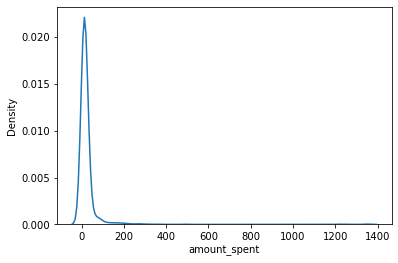

In [64]:
distribution_spain = sns.kdeplot(customers_spain['amount_spent'])

#### Select all orders made in the month of August

In [65]:
august_orders = orders[orders['month'] == 8]
august_orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [66]:
august_countries = august_orders['Country'].value_counts()
august_countries

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [76]:
avg_countries = orders[['Country','amount_spent']]
average_countries = avg_countries.groupby('Country').mean().reset_index()
average_countries

,Country,amount_spent
0,Australia,116.895620
1,Austria,25.624824
2,Bahrain,32.258824
3,Belgium,20.283772
4,Brazil,35.737500
5,Canada,24.280662
6,Channel Islands,27.340160
7,Cyprus,22.134169
8,Czech Republic,33.069600
9,Denmark,49.882474


#### What's the most expensive item?

In [68]:
most_expensive_item = orders['UnitPrice'].max()
most_expensive_item

8142.75

#### What was the average amount spent per year ?

In [69]:
max_per_year = orders.groupby('year')['amount_spent'].max()
max_per_year

year
2010      3828.0
2011    168469.6
Name: amount_spent, dtype: float64

In [77]:
max_amount = orders[['year','amount_spent']]
max_per_year2 = round(max_amount.groupby('year').max().reset_index())
max_per_year2

,year,amount_spent
0,2010,3828.0
1,2011,168470.0
